# The toy model ... model

$\vec{B}_{\mathrm{sim}}(x,y,z)= B_{HVC} \cdot \left\{
\begin{array}{ll}
      \frac{\sqrt{x^2+z^2}}{\left(1-|y|\right)^2} \left(1-\left|\frac{\sqrt{x^2+z^2}}{1-|y|}-1\right|\right) \begin{bmatrix}-z \\ 0 \\ x \\ \end{bmatrix} & z < 0 \wedge \sqrt{x^2+z^2} \leq 2-2|y| \wedge |y| < 1 \\
      (1-0.5|z|) \frac{|x|}{\left(1-|y|\right)^2} \left(1-\left|\frac{|x|}{1-|y|}-1\right|\right) \begin{bmatrix}0 \\ 0 \\ x \\ \end{bmatrix} & z \geq 0 \wedge \sqrt{x^2+z^2} \leq 2-2|y| \wedge |y| < 1 \\
      \textbf{0} &  \mathrm{otherwise} \\
\end{array} 
\right. $

In [1]:
import numpy as np
import copy

def B_sim_list(xs, ys, zs, B=1):
    s = xs.shape
    xss, yss, zss = copy.deepcopy(xs), copy.deepcopy(ys), copy.deepcopy(zs)
    for xi in range(s[0]):
        for yi in range(s[1]):
            for zi in range(s[2]):
                #[zi][yi][xi]
                x = xs[xi][yi][zi]
                y = ys[xi][yi][zi]
                z = zs[xi][yi][zi]
                xv, yv, zv = B_sim(x, y, z, B)
                xss[xi][yi][zi] = xv
                yss[xi][yi][zi] = yv
                zss[xi][yi][zi] = zv
    return [xss, yss, zss]

def B_sim_list_2d(xs, y, zs, B=1):
    s = xs.shape
    xss, zss = copy.deepcopy(xs), copy.deepcopy(zs)
    for xi in range(s[0]):
        for zi in range(s[1]):
            #[zi][yi][xi]
            x = xs[xi][zi]
            z = zs[xi][zi]
            xv, yv, zv = B_sim(x, y, z, B)
            xss[xi][zi] = xv
            zss[xi][zi] = zv
    return [xss, zss]


def B_sim(x, y, z, B=1):
    r = np.sqrt(x**2+z**2)
    y0 = 1 - np.abs(y)
    zr = 1 - 0.5 * np.abs(z)
    vec = np.array([0, 0, 0])
    scale = 0
    if (np.abs(y) < 1) and (r <= 2 - 2 * np.abs(y)):
        if z < 0:
            scale = r/y0**2 * (1-np.abs(r/y0 - 1))
            return [B * scale * -z, 0, B * scale * x]
        elif z >= 0:
            scale = zr * np.abs(x)/y0**2 * (1-np.abs(np.abs(x)/y0 - 1))
            return [0, 0, B * scale * x]
    return [0, 0, 0]

def B_sim_simple(x, y, z, B=1):
    r = np.sqrt(x**2+z**2)
    y0 = 1 - np.abs(y)
    zr = 1 - 0.5 * np.abs(z)
    #vec = np.array([-z, 0, x])
    scale = np.nan_to_num(r/y0**2 * (1-np.abs(r/y0 - 1)), nan=0.0, posinf=0.0, neginf=0.0)
    return [B * scale * -z, 0, B * scale * x]

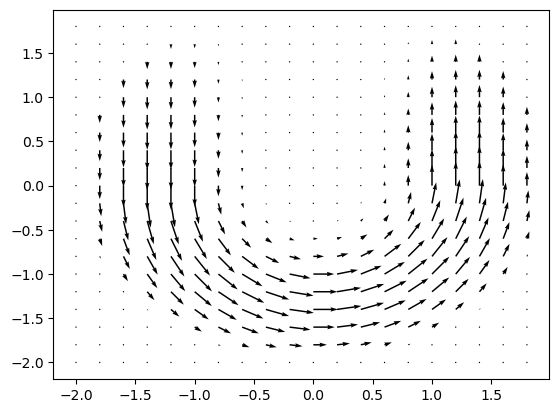

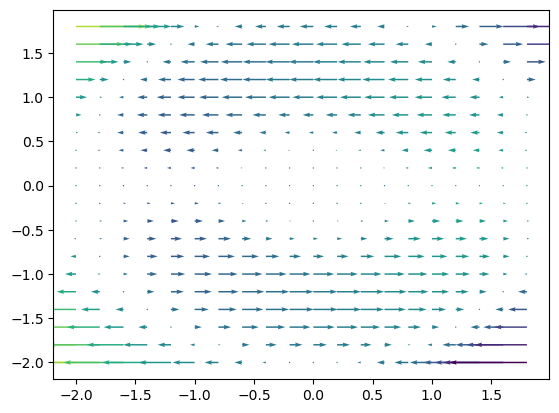

C:\Users\olive\AppData\Local\Temp\ipykernel_9264\1292978092.py:54: RuntimeWarning: divide by zero encountered in divide
  scale = np.nan_to_num(r/y0**2 * (1-np.abs(r/y0 - 1)), nan=0.0, posinf=0.0, neginf=0.0)
C:\Users\olive\AppData\Local\Temp\ipykernel_9264\1292978092.py:54: RuntimeWarning: invalid value encountered in divide
  scale = np.nan_to_num(r/y0**2 * (1-np.abs(r/y0 - 1)), nan=0.0, posinf=0.0, neginf=0.0)


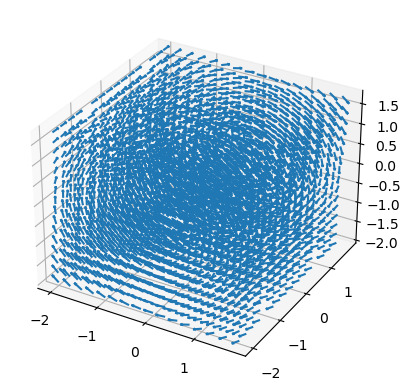

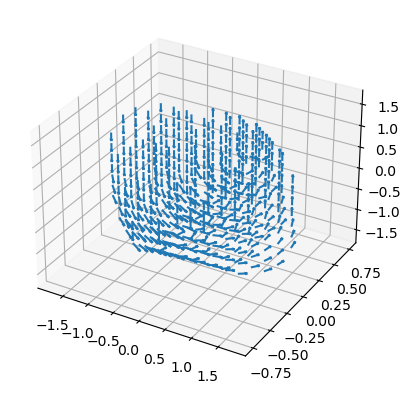

In [2]:
import matplotlib.pyplot as plt

#fig = plt.figure().add_subplot(projection='3d')

zoom = 2
density2d = 0.2
density3d = 0.25
length = 0.2

#x, y, z = np.meshgrid(np.arange(-zoom, zoom, 0.2),
#                      np.arange(-zoom, zoom, 0.2),
#                      np.arange(-zoom, zoom, 0.2))

x, z = np.meshgrid(np.arange(-zoom, zoom, density2d),
                   np.arange(-zoom, zoom, density2d), indexing='ij')

plt.quiver(x, z, *B_sim_list_2d(x, 0, z), units='xy', scale=1/length)
plt.show()

plt.quiver(x, z, *B_sim_simple(x, 0, z), units='xy', scale=1/length)
plt.show()

x, y, z = np.meshgrid(np.arange(-zoom, zoom, density3d),
                      np.arange(-zoom, zoom, density3d),
                      np.arange(-zoom, zoom, density3d), indexing='ij')

fig = plt.figure().add_subplot(projection='3d')
fig.quiver(x, y, z, *B_sim_simple(x, y, z), length=length, normalize=True)
plt.show()

fig = plt.figure().add_subplot(projection='3d')

bl = B_sim_list(x, y, z)

#c = y#np.sqrt(bl[0]**2+bl[1]**2+bl[2]**2)
#c = (c.ravel() - c.min()) / c.ptp()
#c = np.concatenate((c, np.repeat(c, 2)))
#c = plt.cm.hsv(c)

fig.quiver(x, y, z, *bl, length=length, normalize=True)#, colors=c)
plt.show()

In [11]:
from scipy.integrate import quad

def R(a, b, c):
    return np.matrix([
        [np.cos(a)*np.cos(b),
         np.cos(a)*np.sin(b)*np.sin(c)-np.sin(a)*np.cos(c),
         np.cos(a)*np.sin(b)*np.cos(c)+np.sin(a)*np.sin(c)],

        [np.sin(a)*np.cos(b),
         np.sin(a)*np.sin(b)*np.sin(c)+np.cos(a)*np.cos(c),
         np.sin(a)*np.sin(b)*np.cos(c)-np.cos(a)*np.sin(c)],

        [-np.sin(b), np.cos(b)*np.sin(c), np.cos(b)*np.cos(c)]
    ])

def P_unint(x, y, z, a=0, b=0, c=0, B=1):
    R_inv = R(a, b, c).getT()
    inp = np.array(R_inv.dot([x, y, z]))[0]
    B_sim_true = B_sim(*inp, B)
    B_rot = np.array(R(a, b, c).dot(B_sim_true))[0]
    return B_rot[2]

def P_int(x, y, a=0, b=0, c=0, B=1):
    lamb = lambda z: P_unint(x, y, z, a, b, c, B)
    result = quad(lamb, -10, 10, limit=500)
    return 0.5 * result[0]

In [12]:
P_int(1, 0)

1.1495043521397748